In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from lightgbm import LGBMClassifier

from src.datamanager import DataManager
from src.studymanager import StudyManager, Optimizer, Param

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data_filepath = './data/sepsis_updated_data_Feb21-Sep23.csv'
y_label = 'bc_positive_or_diagnosis_or_cause_of_death'
seed = 2024
n_trials = 64
columns_of_interest = ['Apgar1', 'Apgar5', 'Age', 'Gender',
       'Satsair', 'Typebirth', 'Romlength', 
       'Gestation', 'Birthweight', 'Temperature', 'Skin',
       'Dangersigns', 'Signsrd', 'Wob', 'Activity', 'Umbilicus', 'Colour',
       'Rr', 'Vomiting', 'Abdomen', 'Fontanelle', 'Hr']

In [4]:
study_managers = []

for reduce_cardinality in [True, False]:
    lr_study_manager = StudyManager('lr', y_label, data_filepath, columns_of_interest, seed, n_trials, LogisticRegression, None, {'penalty': None, 'max_iter': 10000}, reduce_cardinality=reduce_cardinality)
    lr_study_manager.run()
    lr_study_manager.enhance()
    study_managers.append(lr_study_manager)
    
    lgb_study_manager = StudyManager('lgb', y_label, data_filepath, columns_of_interest, seed, n_trials, LGBMClassifier, [
        Param('n_estimators', 'suggest_int', (100, 1000, 100)),
        Param('max_depth', 'suggest_int', (3, 10)),
        # Param('min_data_in_leaf', 'suggest_int', (20, 100, 10)),
        # Param('bagging_fraction', 'suggest_float', (0.5, 1.0)),
        # Param('feature_fraction', 'suggest_float', (0.5, 1.0)),
        Param('reg_alpha', 'suggest_float', (0, 1)),
        Param('reg_lambda', 'suggest_float', (0, 1)),
        Param('min_split_gain', 'suggest_float', (0, 1)),
        Param('colsample_bytree', 'suggest_float', (0.3, 1.0)),
        Param('learning_rate', 'suggest_float', (0.01, 0.3), kwargs={'log': True}),
        Param('num_leaves', 'suggest_int', (8, 128), kwargs={'step': 2})
    ], {'objective': 'binary'}, scale=True, dummies=True, reduce_cardinality=reduce_cardinality)
    lgb_study_manager.run()
    lgb_study_manager.enhance()
    study_managers.append(lgb_study_manager)


[0.06666867 0.10119752 0.06670079]
Best_clf fitted:LogisticRegression(max_iter=10000, penalty=None)
Test set performance..:
0.6651432694909648


[I 2024-01-23 15:59:14,687] A new study created in memory with name: no-name-990f78c4-64db-4799-8647-faab2ec086aa
[I 2024-01-23 15:59:15,691] Trial 0 finished with value: 0.0713314575465291 and parameters: {'n_estimators': 700, 'max_depth': 6, 'reg_alpha': 0.9086596502787867, 'reg_lambda': 0.058423259590356214, 'min_split_gain': 0.5040345054567119, 'colsample_bytree': 0.6429645587164423, 'learning_rate': 0.2407556512519663, 'num_leaves': 64}. Best is trial 0 with value: 0.0713314575465291.
[I 2024-01-23 15:59:15,980] Trial 1 finished with value: 0.0827268961930369 and parameters: {'n_estimators': 300, 'max_depth': 9, 'reg_alpha': 0.1605221904783276, 'reg_lambda': 0.644417932431038, 'min_split_gain': 0.25080755809020927, 'colsample_bytree': 0.7813322215146955, 'learning_rate': 0.05806224051195155, 'num_leaves': 14}. Best is trial 1 with value: 0.0827268961930369.
[I 2024-01-23 15:59:16,264] Trial 2 finished with value: 0.08877524314332146 and parameters: {'n_estimators': 500, 'max_depth

[0.08708215 0.08387058 0.10436638]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.8416102947585625,
               learning_rate=0.02926753096952243, max_depth=3,
               min_split_gain=0.8648461457801284, num_leaves=74,
               objective='binary', reg_alpha=0.4565194390329942,
               reg_lambda=0.10623328807563844)
Test set performance..:
0.7603255259228079
[0.07102774 0.10205553 0.06211594]
Best_clf fitted:LogisticRegression(max_iter=10000, penalty=None)
Test set performance..:
0.623811098750213


[I 2024-01-23 16:01:53,730] A new study created in memory with name: no-name-2a9aa933-22c1-4fb0-9bc0-01339ad1b3c6
[I 2024-01-23 16:01:54,159] Trial 0 finished with value: 0.07911232981071366 and parameters: {'n_estimators': 800, 'max_depth': 10, 'reg_alpha': 0.3284882522745841, 'reg_lambda': 0.03252844614911077, 'min_split_gain': 0.7648892641803229, 'colsample_bytree': 0.7117611545584905, 'learning_rate': 0.06739928782644185, 'num_leaves': 124}. Best is trial 0 with value: 0.07911232981071366.
[I 2024-01-23 16:01:54,592] Trial 1 finished with value: 0.07151271882456824 and parameters: {'n_estimators': 600, 'max_depth': 8, 'reg_alpha': 0.007052761624450676, 'reg_lambda': 0.45056666325147254, 'min_split_gain': 0.6308891101080158, 'colsample_bytree': 0.5098638481315582, 'learning_rate': 0.08189204431597791, 'num_leaves': 44}. Best is trial 0 with value: 0.07911232981071366.
[I 2024-01-23 16:01:54,852] Trial 2 finished with value: 0.07865414462974989 and parameters: {'n_estimators': 200, '

[0.0954736  0.082777   0.09406319]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.6017879238576717,
               learning_rate=0.011115661401836865, max_depth=5,
               min_split_gain=0.15848627550622807, n_estimators=200,
               num_leaves=8, objective='binary', reg_alpha=0.3186716082753554,
               reg_lambda=0.7317706467356035)
Test set performance..:
0.7539437946620966


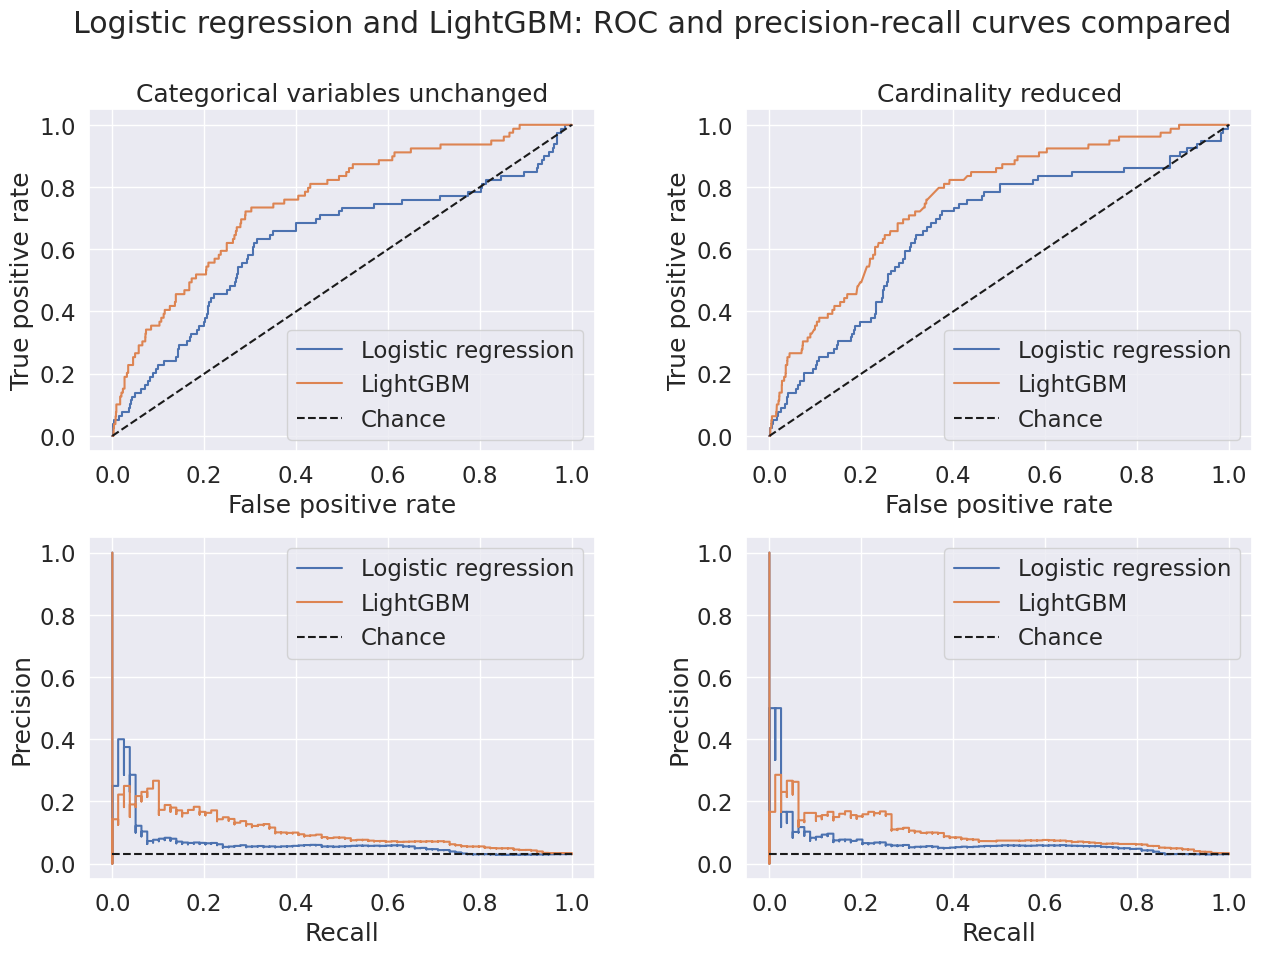

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for idx, sm in enumerate(study_managers):
    if sm.reduce_cardinality:
        y = 1
    else: 
        y = 0
    x = 0
    ax = axes[x, y]
    if sm.name == 'lgb':
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='LightGBM', plot_chance_level=True, chance_level_kw={'label':'Chance'})
    else:
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='Logistic regression')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(loc='lower right')
    axis_title = 'Cardinality reduced' if sm.reduce_cardinality else 'Categorical variables unchanged'
    ax.set_title(axis_title)
    # ax.label_outer()
    x = 1
    ax = axes[x, y]
    if sm.name == 'lgb':
        PrecisionRecallDisplay.from_predictions(
            sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='LightGBM', plot_chance_level=True, chance_level_kw={'label':'Chance'}
        )
    else:
        PrecisionRecallDisplay.from_predictions(
            sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='Logistic regression'
        )
        
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='upper right')
    # ax.set_title(sm.reduce_cardinality)
    # ax.label_outer()
plt.subplots_adjust(hspace=0.25, wspace=0.3)
fig.suptitle('Logistic regression and LightGBM: ROC and precision-recall curves compared')
plt.savefig('lr_lgb_compared_v6.png', pad_inches=0.0)

In [6]:
for idx, sm in enumerate(study_managers):
    print(sm.name, sm.reduce_cardinality)
    print(f'{roc_auc_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')
    print(f'{average_precision_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')

lr True
0.665
0.071
lgb True
0.760
0.100
lr False
0.624
0.067
lgb False
0.754
0.104


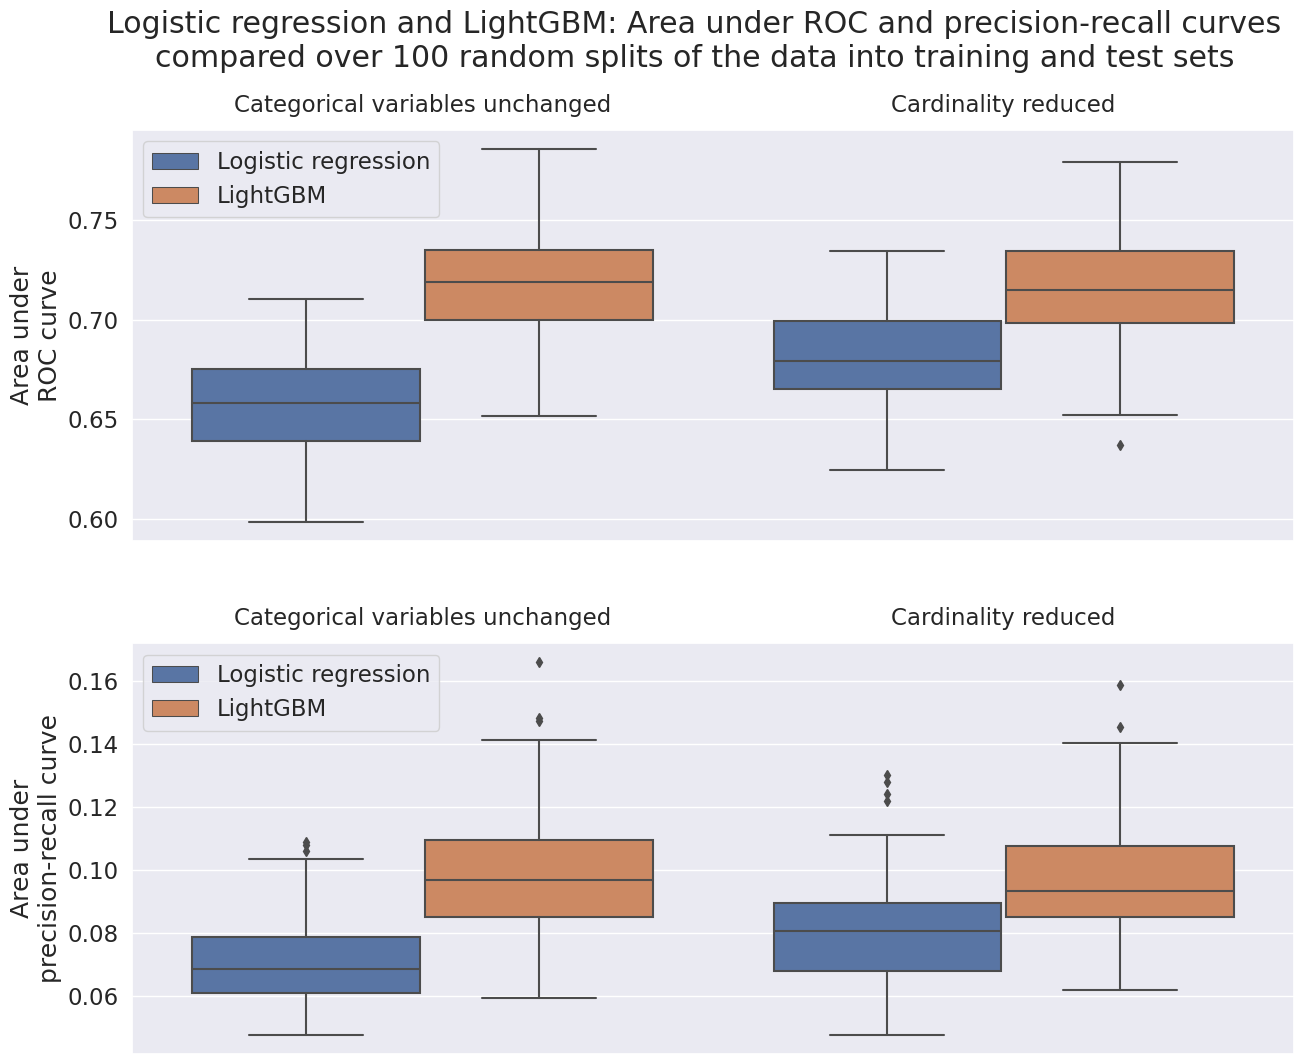

In [7]:
seed_shuffle_df = pd.concat([pd.DataFrame(sm.seed_shuffle_rows) for sm in study_managers])
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
seed_shuffle_df['Model type'] = seed_shuffle_df['name'].apply(
    lambda x: 'LightGBM' if x == 'lgb' else 'Logistic regression'
)
seed_shuffle_df['reduce_cardinality'] = pd.Categorical(seed_shuffle_df['reduce_cardinality'].apply(
    lambda x: 'Cardinality reduced' if x else 'Categorical variables unchanged'
), categories=['Categorical variables unchanged', 'Cardinality reduced'])
for idx, metric in enumerate(['test_set_auroc', 'test_set_auprc']):   
    ax = axes[idx]
    sns.boxplot(seed_shuffle_df, hue='Model type', x='reduce_cardinality', y=metric, ax=ax)
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', top=False)
    ax.set_xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)
    ylabel = 'Area under\nROC curve' if metric == 'test_set_auroc' else 'Area under\nprecision-recall curve'
    ax.set_ylabel(ylabel)
        
plt.subplots_adjust(hspace=0.25, wspace=0.3)
fig.suptitle('Logistic regression and LightGBM: Area under ROC and precision-recall curves\ncompared over 100 random splits of the data into training and test sets')
plt.savefig('lr_lgb_compared_boxplot_v2.png', pad_inches=0.0)

In [8]:
study_managers_full = []

for reduce_cardinality in [True, False]:    
    lgb_study_manager = StudyManager('lgb', y_label, data_filepath, columns_of_interest, seed, n_trials, LGBMClassifier, [
        Param('n_estimators', 'suggest_int', (100, 1000, 100)),
        Param('max_depth', 'suggest_int', (3, 10)),
        # Param('min_data_in_leaf', 'suggest_int', (20, 100, 10)),
        # Param('bagging_fraction', 'suggest_float', (0.5, 1.0)),
        # Param('feature_fraction', 'suggest_float', (0.5, 1.0)),
        Param('reg_alpha', 'suggest_float', (0, 1)),
        Param('reg_lambda', 'suggest_float', (0, 1)),
        Param('min_split_gain', 'suggest_float', (0, 1)),
        Param('colsample_bytree', 'suggest_float', (0.3, 1.0)),
        Param('learning_rate', 'suggest_float', (0.01, 0.3), kwargs={'log': True}),
        Param('num_leaves', 'suggest_int', (8, 128), kwargs={'step': 2})
    ], {'objective': 'binary'}, scale=False, dummies=False, reduce_cardinality=reduce_cardinality)
    lgb_study_manager.run()
    lgb_study_manager.enhance()
    study_managers_full.append(lgb_study_manager)

[I 2024-01-23 16:02:47,176] A new study created in memory with name: no-name-641a96a7-c9b1-4210-8a2d-f019d2d5c1fe
[I 2024-01-23 16:02:47,330] Trial 0 finished with value: 0.08100275214597817 and parameters: {'n_estimators': 300, 'max_depth': 9, 'reg_alpha': 0.9581029204018181, 'reg_lambda': 0.7284412942521573, 'min_split_gain': 0.835261456284996, 'colsample_bytree': 0.7277896808556638, 'learning_rate': 0.16687655744257351, 'num_leaves': 46}. Best is trial 0 with value: 0.08100275214597817.
[I 2024-01-23 16:02:47,480] Trial 1 finished with value: 0.0815475591041571 and parameters: {'n_estimators': 100, 'max_depth': 6, 'reg_alpha': 0.3698379070772275, 'reg_lambda': 0.669899747826869, 'min_split_gain': 0.9458281800455868, 'colsample_bytree': 0.4210384081122499, 'learning_rate': 0.09683944662063824, 'num_leaves': 20}. Best is trial 1 with value: 0.0815475591041571.
[I 2024-01-23 16:02:47,686] Trial 2 finished with value: 0.08359623156679802 and parameters: {'n_estimators': 300, 'max_depth'

[0.07905163 0.07551669 0.10477938]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.5966184863307331,
               learning_rate=0.05469379734713704, max_depth=10,
               min_split_gain=0.725325380546551, n_estimators=300,
               num_leaves=62, objective='binary', reg_alpha=0.9999455576617916,
               reg_lambda=0.42565676431117877)
Test set performance..:
0.6713784348864994


[I 2024-01-23 16:03:36,898] A new study created in memory with name: no-name-3e12476a-7565-4cd7-815f-078bebd56fc7
[I 2024-01-23 16:03:37,133] Trial 0 finished with value: 0.08283927502496805 and parameters: {'n_estimators': 300, 'max_depth': 3, 'reg_alpha': 0.27665378603437063, 'reg_lambda': 0.91481364054171, 'min_split_gain': 0.19315015130493518, 'colsample_bytree': 0.9104037371459475, 'learning_rate': 0.030669405924925154, 'num_leaves': 76}. Best is trial 0 with value: 0.08283927502496805.
[I 2024-01-23 16:03:37,606] Trial 1 finished with value: 0.07890256508650982 and parameters: {'n_estimators': 600, 'max_depth': 7, 'reg_alpha': 0.5322590012458374, 'reg_lambda': 0.570231468623204, 'min_split_gain': 0.16212068870001928, 'colsample_bytree': 0.6232589714777358, 'learning_rate': 0.031325065410552716, 'num_leaves': 30}. Best is trial 0 with value: 0.08283927502496805.
[I 2024-01-23 16:03:37,886] Trial 2 finished with value: 0.0845080572836983 and parameters: {'n_estimators': 700, 'max_d

[0.07482246 0.06989263 0.10764205]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.7665394169076688,
               learning_rate=0.011969572557704056, max_depth=4,
               min_split_gain=0.1838011945938028, n_estimators=400,
               num_leaves=96, objective='binary', reg_alpha=0.6120031538693276,
               reg_lambda=0.5764282096937203)
Test set performance..:
0.6692801672640382


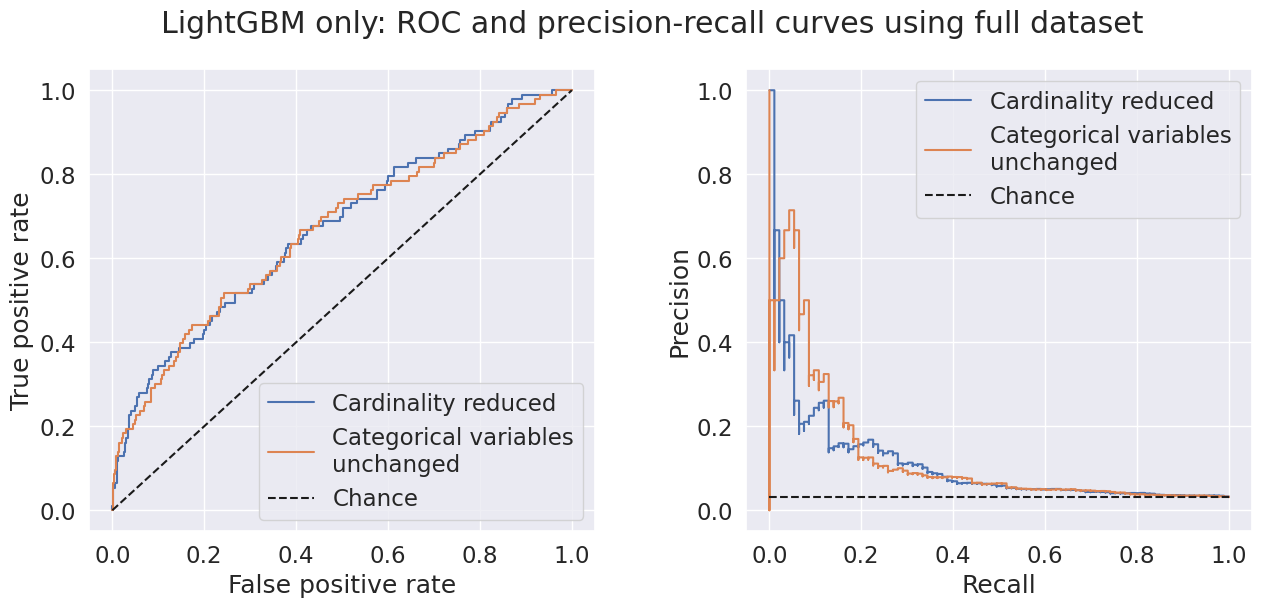

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
for sm in study_managers_full:
    if sm.reduce_cardinality:
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[0], label='Cardinality reduced')
        PrecisionRecallDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[1], label='Cardinality reduced')
    else:
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[0], label='Categorical variables\nunchanged', plot_chance_level=True, chance_level_kw={'label':'Chance'})
        PrecisionRecallDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[1], label='Categorical variables\nunchanged', plot_chance_level=True, chance_level_kw={'label':'Chance'})
axes[0].set_xlabel('False positive rate')
axes[0].set_ylabel('True positive rate')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[0].legend(loc='lower right')
axes[1].legend(loc='upper right')
plt.subplots_adjust(hspace=0.25, wspace=0.3)
fig.suptitle('LightGBM only: ROC and precision-recall curves using full dataset')
plt.savefig('lgb_only_v2.png', pad_inches=0.0)

In [10]:
for idx, sm in enumerate(study_managers_full):
    print(sm.name, sm.reduce_cardinality)
    print(f'{roc_auc_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')
    print(f'{average_precision_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')

lgb True
0.671
0.112
lgb False
0.669
0.126
